# downscaling using coherence and angle
Algorithm: break image into *k* by *k* blocks, and create image with dimensions (h/k, w/k) with each pixel representing the max coherence and associated angle

In [40]:
import numpy as np
from modules_no_st import coh_ang_calc
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

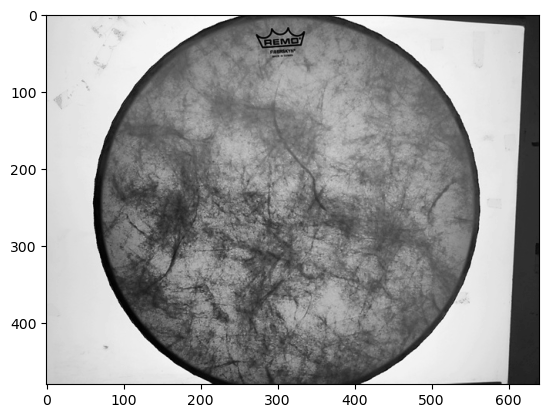

In [41]:
drumhead = rgb2gray(cv.imread("drumhead.jpg"))
plt.imshow(drumhead, cmap='gray')

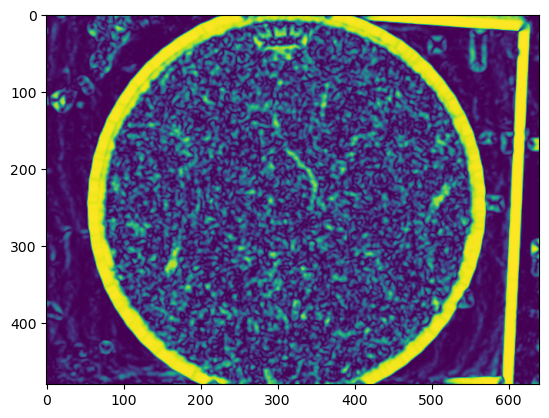

In [42]:
coherence, angle = coh_ang_calc(drumhead, epsilon=.1)
plt.imshow(coherence)

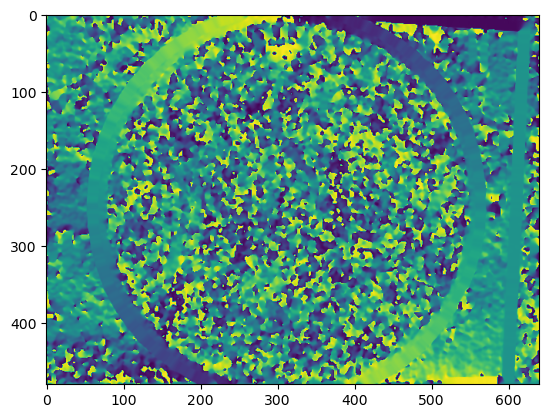

In [43]:
plt.imshow((angle + np.pi)/(np.pi * 2))

In [44]:
coherence.shape

(480, 640)

In [66]:
def downscale_coh_ang(coherence, angle, k):
    (h, w) = coherence.shape
    h_small = h//k
    w_small = w//k
    coherence_clipped = coherence[0:h_small*k, 0:w_small*k]
    angle_clipped = angle[0:h_small*k, 0:w_small*k]
    coherence_small = np.zeros((h_small, w_small))
    angle_small = np.zeros((h_small, w_small))

    for r_small in range(0, h_small):
        for c_small in range(0, w_small):
            neighborhood_coherence = coherence_clipped[r_small*k:(r_small+1)*k, c_small*k:(c_small+1)*k]
            neighborhood_angle = angle_clipped[r_small*k:(r_small+1)*k, c_small*k:(c_small+1)*k]
            r_max, c_max = np.unravel_index(np.argmax(neighborhood_coherence), neighborhood_coherence.shape)
            coherence_small[r_small, c_small] = neighborhood_coherence[r_max, c_max]
            angle_small[r_small, c_small] = neighborhood_angle[r_max, c_max]
    return coherence_small, angle_small

In [73]:
coh_small, ang_small = downscale_coh_ang(coherence, angle, 20)

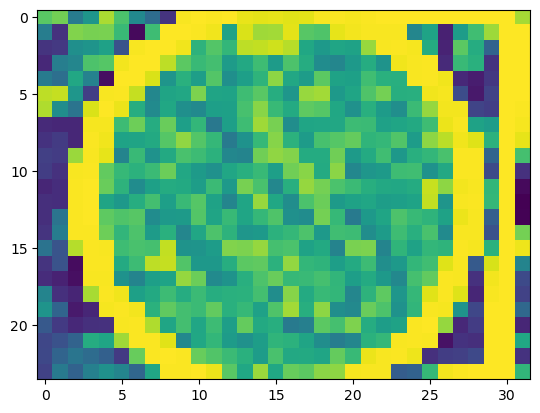

In [74]:
plt.imshow(coh_small)

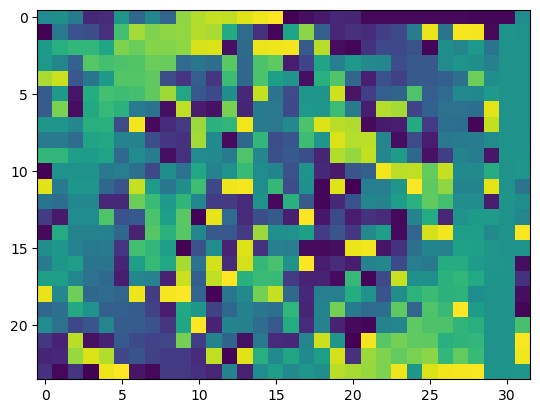

In [75]:
plt.imshow(ang_small)

In [58]:
arr = np.ones((2, 3))
arr[1, 2] += 1
arr[0, 1] += 1
arr

array([[1., 2., 1.],
       [1., 1., 2.]])

In [59]:
np.argmax(arr)

1

In [60]:
x, y = np.unravel_index(np.argmax(arr), arr.shape)

In [61]:
x, y

(0, 1)